In [1]:
import pandas as pd
import numpy as np
import config
from config import gkey

In [2]:
df=pd.read_csv('../csv/la_rest_types.csv', index_col=False)

In [3]:
# df.sample()
df.head(2)


id           name  \
0  __4rPIbNWudQVuoaRs2MuQ  Best Shawarma   
1  __4rPIbNWudQVuoaRs2MuQ  Best Shawarma   

                                   address  category_title  rating  \
0  602 W Glenoaks Blvd  Glendale, CA 91202  Middle Eastern     4.0   
1  602 W Glenoaks Blvd  Glendale, CA 91202        Barbeque     4.0   

   review_count        lat         lon zipcodes  
0           349  34.159455 -118.267173    91202  
1           349  34.159455 -118.267173    91202

In [4]:
df.zipcodes.str.startswith('9')

0        True
1        True
2        True
3        True
4        True
         ... 
61420    True
61421    True
61422    True
61423    True
61424    True
Name: zipcodes, Length: 61425, dtype: bool

In [5]:
df=df[df.zipcodes.str.startswith('9')]

In [6]:
# df.isnull()

In [7]:
df['category_title'].replace(' ', np.nan, inplace=True)

In [8]:
# df.isnull()

In [9]:
df.dropna(inplace=True)

In [10]:
df.reset_index(drop=True)
df.sample()

id                         name  \
61110  #NAME?  Pupuseria Sabor El Salvador   

                                      address category_title  rating  \
61110  529 W Rosecrans Ave  Compton, CA 90222     Salvadoran     4.0   

       review_count        lat         lon zipcodes  
61110            18  33.903549 -118.233601    90222

In [11]:
# df.isnull()

In [12]:
df['rating'].value_counts()

4.0    13291
4.5     7968
3.5     7900
3.0     4029
5.0     2504
2.5     2346
2.0     2010
1.5      832
1.0      268
Name: rating, dtype: int64

In [13]:
# df['category_title'].value_counts(normalize=True)
df['rating'].value_counts(bins=3)

(3.667, 5.0]      23763
(2.333, 3.667]    14275
(0.995, 2.333]     3110
Name: rating, dtype: int64

In [14]:
import matplotlib

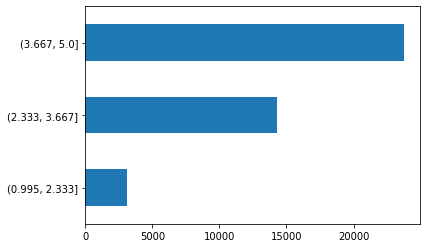

In [44]:
binplt=df.rating.value_counts(bins=3).sort_values().plot(kind = 'barh')


In [62]:
binplt.figure.savefig('plots/bin_plot.png')

In [63]:
cat_desc=df['category_title'].describe()

#cat_desc.value_counts()

In [64]:
 %matplotlib inline

In [65]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

In [66]:
desc=df.describe()
desc

rating  review_count           lat           lon
count  41148.000000  41148.000000  41148.000000  41148.000000
mean       3.710460    320.939122     33.979838   -118.256826
std        0.824635    541.021245      0.122265      0.173395
min        1.000000      1.000000     33.167953   -122.636364
25%        3.500000     40.000000     33.884035   -118.367151
50%        4.000000    141.000000     34.009925   -118.267295
75%        4.500000    384.000000     34.063720   -118.144367
max        5.000000  16955.000000     37.895588   -117.225868

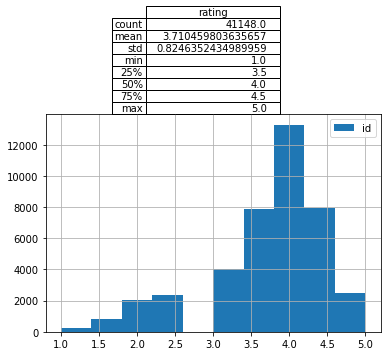

In [67]:
fig, axes = plt.subplots(1,1)
axes = df['rating'].hist()

plt.legend(df.columns)
dfsummary = pd.DataFrame(df['rating'].describe())

plt.table(cellText=dfsummary.values,
      colWidths = [0.4]*2,
      rowLabels=dfsummary.index,
      colLabels=dfsummary.columns,
      cellLoc = 'right', rowLoc = 'right',
      loc='top')

plt.show()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x101e4e7ad0>,
      dtype=object)

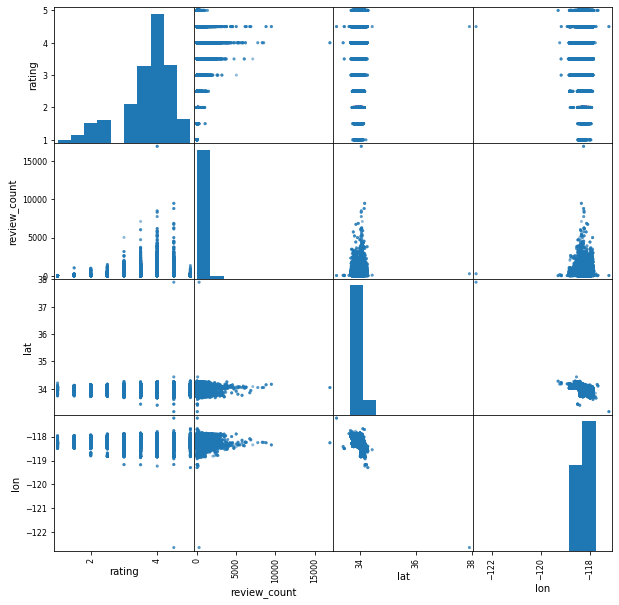

In [68]:
scatter_matrix(df, figsize=(10,10))

In [69]:
desc.groupby('rating')['review_count'].mean()

rating
0.824635          541.021245
1.000000            1.000000
3.500000           40.000000
3.710460          320.939122
4.000000          141.000000
4.500000          384.000000
5.000000        16955.000000
41148.000000    41148.000000
Name: review_count, dtype: float64

In [70]:
desc.groupby('rating')['review_count'].mean()

rating
0.824635          541.021245
1.000000            1.000000
3.500000           40.000000
3.710460          320.939122
4.000000          141.000000
4.500000          384.000000
5.000000        16955.000000
41148.000000    41148.000000
Name: review_count, dtype: float64

In [71]:
# df[df['rating']> 2.5].groupby('address')['rating']

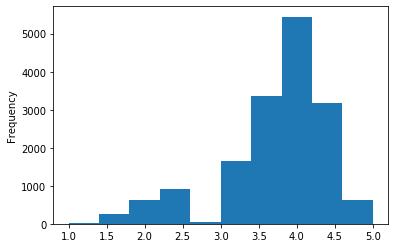

In [85]:
gr_zip = df.groupby(['zipcodes', 'review_count'])['rating'].median().reset_index()

hist=gr_zip['rating'].plot(kind='hist')
# gr_zip=gr_zip.min()




In [86]:
hist.figure.savefig('plots/hist.png')

In [87]:
df.groupby('category_title').rating.apply(lambda x: len(x[x>2.5])/len(x) )

category_title
 Acai Bowls                0.975610
 African                   1.000000
 American (New)            0.964509
 American (Traditional)    0.860645
 Amusement Parks           0.500000
                             ...   
Waffles                    1.000000
Wine Bars                  1.000000
Wine Tasting Room          1.000000
Wineries                   1.000000
Wraps                      0.500000
Name: rating, Length: 499, dtype: float64

In [88]:
df.sample()

id                  name                                 address  \
60916  #NAME?  Adrians Taco Trailer  1000 S Mateo St  Los Angeles, CA 90021   

      category_title  rating  review_count        lat         lon zipcodes  
60916        Mexican     4.5            42  34.031748 -118.231928    90021

In [89]:
means = df.groupby('zipcodes').mean()['rating']
means
# medians = clean_study_data_complete.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
# variances = clean_study_data_complete.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
# sds = clean_study_data_complete.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
# sems = clean_study_data_complete.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
# summary_table = pd.DataFrame({"Mean Tumor Volume":means,
#                               "Median Tumor Volume":medians,
#                               "Tumor Volume Variance":variances,
#                               "Tumor Volume Std. Dev.":sds,
#                               "Tumor Volume Std. Err.":sems})

zipcodes
90000    4.000000
90001    3.626582
90002    3.352273
90003    3.304965
90004    3.852941
           ...   
94703    5.000000
94970    4.500000
95020    3.000000
95113    3.000000
96001    5.000000
Name: rating, Length: 346, dtype: float64

In [90]:
revCount = df.groupby('zipcodes').sum()['review_count']
revCount


zipcodes
90000     1753
90001     6070
90002     1904
90003     5562
90004    72633
         ...  
94703        1
94970      520
95020       36
95113     2766
96001       18
Name: review_count, Length: 346, dtype: int64

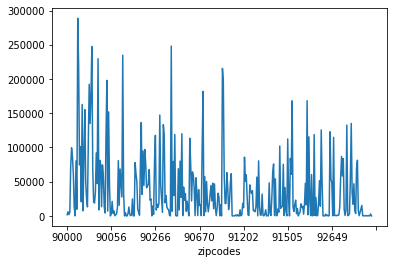

In [91]:
revCount.plot(kind='line')

In [92]:
%%bash
pip install seaborn

In [93]:
means = df.groupby('zipcodes').mean()['rating']
means

zipcodes
90000    4.000000
90001    3.626582
90002    3.352273
90003    3.304965
90004    3.852941
           ...   
94703    5.000000
94970    4.500000
95020    3.000000
95113    3.000000
96001    5.000000
Name: rating, Length: 346, dtype: float64

In [94]:
total_count = df.groupby('zipcodes').size()
total_count

zipcodes
90000      5
90001    237
90002     44
90003    141
90004    323
        ... 
94703      1
94970      2
95020      1
95113      3
96001      3
Length: 346, dtype: int64

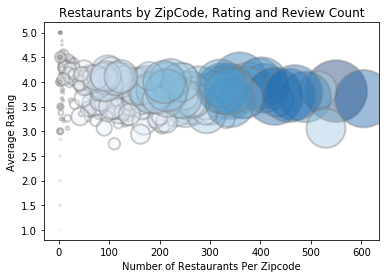

In [95]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
 
# create data
x = total_count
y = means
z = revCount
# z=z*z
# z=z.sum()

# Change color with c and alpha. I map the color to the X axis value.
plt.scatter(x, y, s=z/75, c=z, cmap="Blues", alpha=0.4, edgecolors="grey", linewidth=2)
 
# Add titles (main and on axis)
plt.xlabel("Number of Restaurants Per Zipcode")
plt.ylabel("Average Rating")
plt.title("Restaurants by ZipCode, Rating and Review Count")
 
plt.show()

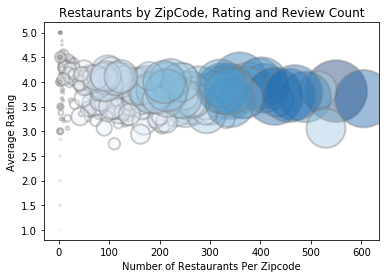

In [104]:
# create data
x = total_count
y = means
z = revCount
# z=z*z
# z=z.sum()

# Change color with c and alpha. I map the color to the X axis value.
plt.scatter(x, y, s=z/75, c=z, cmap="Blues", alpha=0.4, edgecolors="grey", linewidth=2)
 
# Add titles (main and on axis)
plt.xlabel("Number of Restaurants Per Zipcode")
plt.ylabel("Average Rating")
plt.title("Restaurants by ZipCode, Rating and Review Count")
plt.savefig('plots/bubble_plot.png')
plt.show()



In [110]:
g = df.groupby('zipcodes')
rest_zips = [name for name,unused_df in g]
# rest_zips

In [106]:
# rest_zip = df['zipcodes'].unique()
# rest_zip

In [111]:
import gmaps


# Access maps with unique API key
gmaps.configure(api_key=gkey)

In [112]:
# # Customize the size of the figure
# figure_layout = {
#     'width': '400px',
#     'height': '300px',
#     'border': '1px solid black',
#     'padding': '1px',
#     'margin': '0 auto 0 auto'
# }
# fig = gmaps.figure(layout=figure_layout)

In [113]:
#datframe for all types of food
aT=pd.read_csv('../csv/LA_rest_yelp_no_dupes.csv')
aT.sample()

id                  name         phone  \
1466  3jfH3FY3jH16d6U57lBe_A  All Flavor No Grease  1.323318e+10   

                                    address         category_alias  \
1466  728 E 108th St  Los Angeles, CA 90059  foodtrucks, mexican,    

              category_title  rating  review_count       lat        lon  
1466  Food Trucks, Mexican,      4.0           258  33.93804 -118.26194

In [114]:
zipcodes = list()

for item in aT['address']:
    zipcode = item.split()[-1]
    zipcodes.append(zipcode)

aT['zipcodes'] = zipcodes
aT = pd.DataFrame(aT)
aT.sample()

id                         name         phone  \
19265  yz_NUxyTowR0NbN7wjmtHg  Anchor Bay at Sideyard Cafe  1.562493e+10   

                                         address  \
19265  2222 Palo Verde Ave  Long Beach, CA 90815   

                        category_alias                      category_title  \
19265  seafood, newamerican, burgers,   Seafood, American (New), Burgers,    

       rating  review_count        lat         lon zipcodes  
19265     5.0             1  33.796071 -118.107686    90815

In [115]:
list(aT[aT["zipcodes"]=='Kingdom']['address'])

['Suite 131  735 S Figueroa Street  Los Angeles 90017  United Kingdom',
 '243 Castle La West  Bournemouth BH8 9TG  United Kingdom',
 '181 Thornley La South  Stockport SK5 6QG  United Kingdom']

In [116]:
list(aT[aT["zipcodes"]=='CA']['address'])

['Cudahy St  Los Angeles, CA',
 'Los Angeles  Los Angeles, CA',
 'Carson, CA',
 'Torrance, CA',
 '102 Stonewood Mall  Downey, CA',
 'Los Angeles, CA',
 'Los Angeles, CA',
 'Los Angeles, CA',
 'Los Angeles, CA',
 'Long Beach, CA',
 'Los Angeles, CA',
 'Los Angeles, CA',
 'Los Angeles, CA',
 'Hollywood  Holllywood, CA',
 '543 Hotel Cir S  San Pedro, CA',
 'Orange, CA',
 'Los Angeles, CA',
 'Downtown  Los Angeles, CA',
 'Los Angeles, CA',
 'Los Angeles, CA',
 'Los Angeles, CA',
 'Los Angeles, CA',
 'Lakewood, CA',
 'Los Angeles, CA',
 'Los Angeles, CA',
 'Los Angeles, CA',
 'Los Angeles, CA',
 'hollywood  Los Angeles, CA',
 'Los Angeles, CA',
 'Los Angeles, CA',
 'Los Angeles, CA',
 '3RD St Normandie Ave NW  Los Angeles, CA',
 'Los Angeles, CA',
 'Los Angeles, CA',
 '5311 Cotner Ave  Los Angeles, CA',
 'Long Beach, CA',
 'Norwalk, CA',
 'Los Angeles, CA',
 'Los Angeles, CA',
 'Los Angeles, CA',
 'Los Angeles, CA',
 '12TH Between Main And Los Angeles  Santee Alley Area  Los Angeles, CA',
 

In [117]:
aT=aT[aT.zipcodes.str.startswith('9')]
aT.sample()

id           name         phone  \
746  1AwrbEB-FQ32-CtKAdUr4A  Chick 'N Chow  1.310275e+10   

                                     address     category_alias  \
746  9301 W Pico Blvd  Los Angeles, CA 90035  chinese, kosher,    

        category_title  rating  review_count        lat         lon zipcodes  
746  Chinese, Kosher,      3.5            99  34.056073 -118.393096    90035

In [118]:
aT=aT[aT["review_count"]>=100]

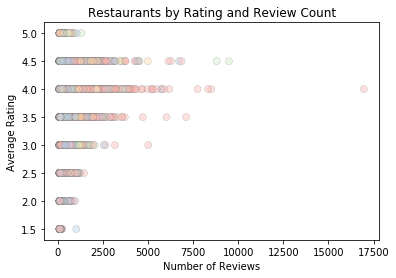

In [198]:
x = aT["review_count"]
y = aT["rating"]
z = aT.zipcodes.astype(int)
# z=z*z
# z=z.sum()

# Change color with c and alpha. I map the color to the X axis value.
plt.scatter(x, y, s=50, c=z, cmap="Pastel1", alpha=0.4, edgecolors="grey", linewidth=.5)
 
# Add titles (main and on axis)
plt.xlabel("Number of Reviews")
plt.ylabel("Average Rating")
plt.title("Restaurants by Rating and Review Count")
plt.savefig('plots/scat_plot.png')
plt.show()

In [199]:
aT[aT["review_count"]>=15000]

id           name         phone  \
15773  TkFEKhsCixPWlShULKvMdQ  Bottega Louie  1.213802e+10   

                                      address  \
15773  700 S Grand Ave  Los Angeles, CA 90017   

                              category_alias  \
15773  italian, bakeries, breakfast_brunch,    

                                category_title  rating  review_count  \
15773  Italian, Bakeries, Breakfast & Brunch,      4.0         16955   

            lat         lon zipcodes  
15773  34.04693 -118.256601    90017

In [200]:
aT[aT["zipcodes"]=='90017'].mean()

phone           1.217504e+10
rating          3.698795e+00
review_count    7.163614e+02
lat             3.404958e+01
lon            -1.182615e+02
zipcodes                 inf
dtype: float64

In [201]:
aT.describe()

phone        rating  review_count           lat           lon
count  1.064200e+04  10741.000000  10741.000000  10741.000000  10741.000000
mean   1.483958e+10      3.821758    503.393259     33.981854   -118.253166
std    2.036202e+09      0.579965    598.806651      0.133527      0.193931
min    1.201844e+10      1.500000    100.000000     33.662399   -122.636364
25%    1.310560e+10      3.500000    179.000000     33.870215   -118.383880
50%    1.424278e+10      4.000000    316.000000     34.017345   -118.280314
75%    1.626965e+10      4.000000    597.000000     34.076020   -118.113167
max    1.951456e+10      5.000000  16955.000000     37.895588   -117.750724

In [202]:
badR=aT[(aT["review_count"]>=500) & (aT["rating"]== 1.5)]

In [203]:
# Store latitude and longitude in locations
locations = badR[["lat", "lon"]]


# Fill NaN values and convert to float
rating = badR["rating"].astype(float)




In [204]:
locations

lat         lon
8855  33.847007 -118.262301

In [205]:
# Plot Heatmap
fig = gmaps.figure(center=(33.847007,-118.262301), tilt=45, zoom_level=12,)


# Assign the marker layer to a variable
markers = gmaps.marker_layer(locations, info_box_content='Buffalo Wild Wings' + '<br>' +' Rating of 1.5!')
# Add the layer to the map
fig.add_layer(markers)
fig

# Create heat layer
# heat_layer = gmaps.heatmap_layer(locations, weights=rating, 
#                                  dissipating=False, max_intensity=10,
#                                  point_radius=1)

# heat_layer = gmaps.heatmap_layer(locations, weights=rating-.5, 
#                                  dissipating=False, max_intensity=1.5,
#                                  point_radius = .0008)

# # Add layer
# fig.add_layer(heat_layer)

# # Display figure
# fig

Figure(layout=FigureLayout(height='420px'))

In [213]:
bestR=aT[aT["review_count"]>=15000]
bestR

id           name         phone  \
15773  TkFEKhsCixPWlShULKvMdQ  Bottega Louie  1.213802e+10   

                                      address  \
15773  700 S Grand Ave  Los Angeles, CA 90017   

                              category_alias  \
15773  italian, bakeries, breakfast_brunch,    

                                category_title  rating  review_count  \
15773  Italian, Bakeries, Breakfast & Brunch,      4.0         16955   

            lat         lon zipcodes  
15773  34.04693 -118.256601    90017

In [214]:
# Store latitude and longitude in locations
locations = bestR[["lat", "lon"]]


# Fill NaN values and convert to float
rating = bestR["rating"].astype(float)




In [215]:
locations

lat         lon
15773  34.04693 -118.256601

In [217]:
# Plot Heatmap
fig = gmaps.figure(center=(34.04693,-118.256601), tilt=45, zoom_level=12,)


# Assign the marker layer to a variable
markers = gmaps.marker_layer(locations, info_box_content='Bottega Louie' + '<br>' +' 17,000 Reviews!')
# Add the layer to the map
fig.add_layer(markers)
fig

# Create heat layer
# heat_layer = gmaps.heatmap_layer(locations, weights=rating, 
#                                  dissipating=False, max_intensity=10,
#                                  point_radius=1)

# heat_layer = gmaps.heatmap_layer(locations, weights=rating-.5, 
#                                  dissipating=False, max_intensity=1.5,
#                                  point_radius = .0008)

# # Add layer
# fig.add_layer(heat_layer)

# # Display figure
# fig

Figure(layout=FigureLayout(height='420px'))

In [253]:
mapdf=aT[(aT["zipcodes"]=='90017') & (aT["rating"]>= 3.5)]


In [254]:
lat=list(mapdf['lat'])
lon=list(mapdf['lon'])

In [255]:
# coordinates = [
#     (40.71, -74.00),]

In [256]:
zip(lat, lon)

In [257]:
coordinates = [x for x in zip(lat, lon)]

In [258]:
# # Customize the size of the figure
# figure_layout = {
#     'width': '400px',
#     'height': '300px',
#     'border': '1px solid black',
#     'padding': '1px',
#     'margin': '0 auto 0 auto'
# }
# fig = gmaps.figure(layout=figure_layout)

In [134]:
# Customize the size of the figure
figure_layout = {
    'width': '400px',
    'height': '300px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout)
# Assign the marker layer to a variable
# markers = gmaps.marker_layer(coordinates)
heat_layer = gmaps.heatmap_layer(coordinates, weights=mapdf['rating']-3.5, 
                                 dissipating=False, max_intensity=1.5,
                                 point_radius = .0008)
# Add the layer to the map
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(border='1px solid black', height='300px', margin='0 auto 0 auto', padding='1px', wi…

NameError: name 'locations' is not defined